In [1]:
#importing the all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# loading the dataset
data=pd.read_csv("/content/Iris.csv")

In [3]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Lable encoding
enc=LabelEncoder()

In [11]:
data.Species=enc.fit_transform(data.Species)

In [12]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Exploratory Data Analysis

In [14]:
pip install ydata_profiling

In [15]:
from ydata_profiling import ProfileReport

In [17]:
view=ProfileReport(data)

In [18]:
view

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

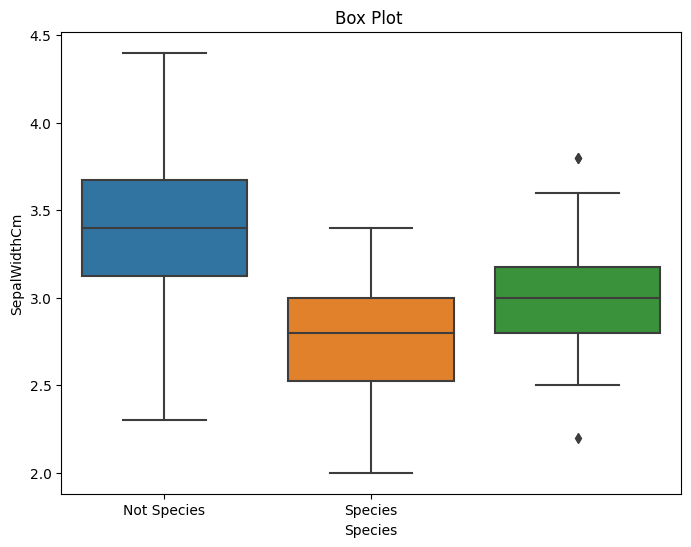

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.title('Box Plot ')
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')
plt.xticks([0, 1], ['Not Species', 'Species'])
plt.show()

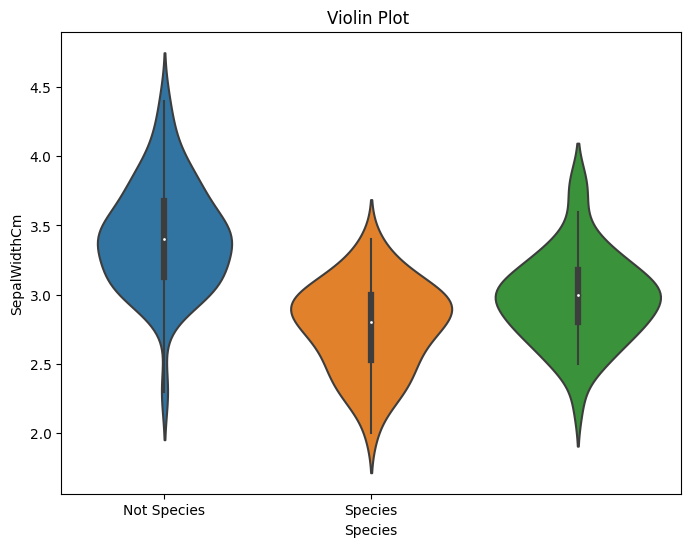

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Species', y='SepalWidthCm', data=data)
plt.title('Violin Plot ')
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')
plt.xticks([0, 1], ['Not Species', 'Species'])
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

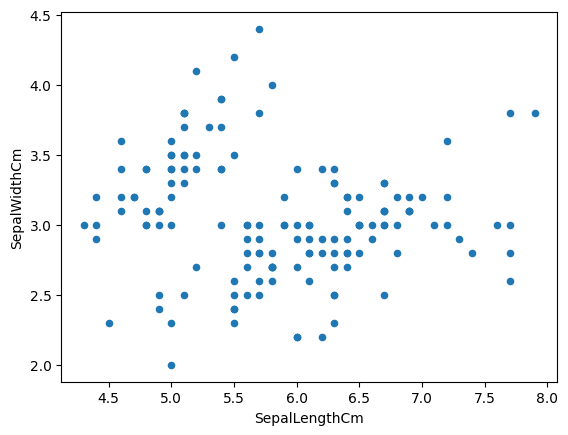

In [21]:
data.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

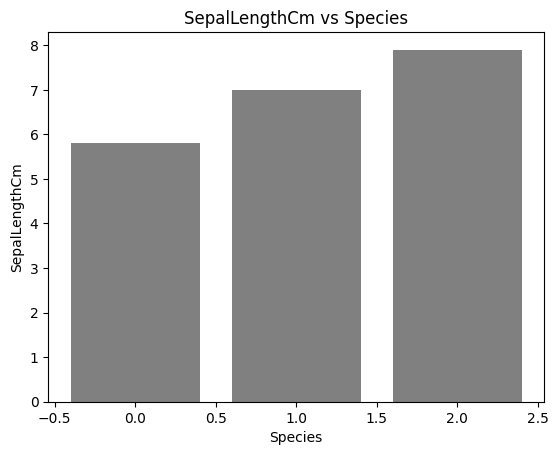

In [22]:
x=data.Species
y=data.SepalLengthCm
plt.bar(x,y,color="grey")
plt.xlabel("Species")
plt.ylabel("SepalLengthCm")
plt.title("SepalLengthCm vs Species")
plt.show()

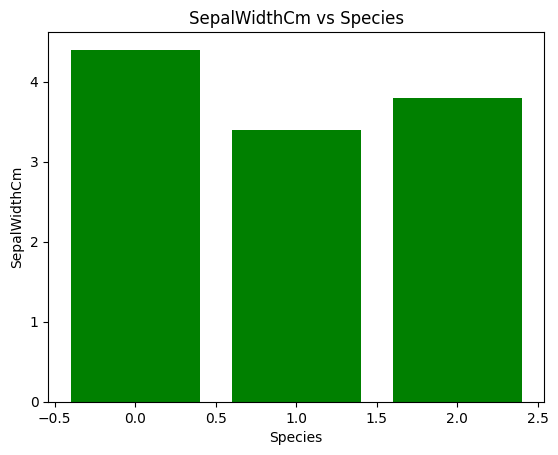

In [23]:
x=data.Species
y=data.SepalWidthCm
plt.bar(x,y,color="green")
plt.xlabel("Species")
plt.ylabel("SepalWidthCm")
plt.title("SepalWidthCm vs Species")
plt.show()

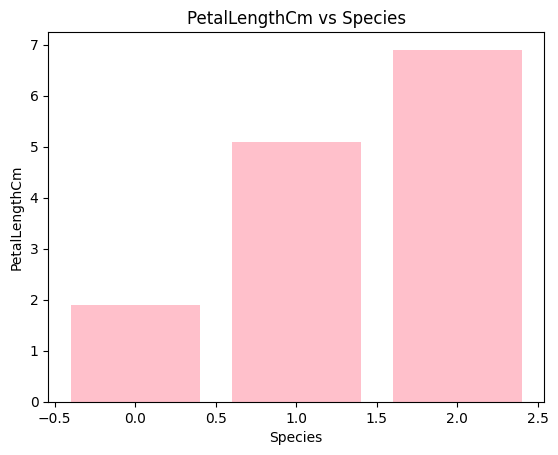

In [24]:
x=data.Species
y=data.PetalLengthCm
plt.bar(x,y,color="pink")
plt.xlabel("Species")
plt.ylabel("PetalLengthCm")
plt.title("PetalLengthCm vs Species")
plt.show()

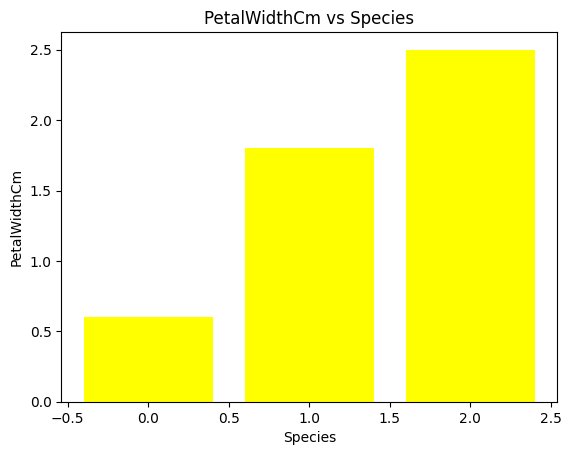

In [25]:
x=data.Species
y=data.PetalWidthCm
plt.bar(x,y,color="yellow")
plt.xlabel("Species")
plt.ylabel("PetalWidthCm")
plt.title("PetalWidthCm vs Species")
plt.show()

In [26]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [27]:
X=data.iloc[:,1:-1]

In [28]:
X

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [29]:
Y=data.iloc[:,-1]

In [30]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=4)

In [32]:
scaler=StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
X_train_std=scaler.transform(X_train)

In [35]:
X_test_std=scaler.transform(X_test)

In [36]:
X_train_std.std()

1.0

In [37]:
X_test_std.std()

0.99458086656372

# Model selction

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,Y_train)

LogisticRegression()

In [40]:
ypred=model.predict(X_test)

In [41]:
accuracy_score(Y_test,ypred)*100

100.0

In [42]:
model2=DecisionTreeClassifier()

In [43]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
ypred=model2.predict(X_test)

In [45]:
accuracy_score(Y_test,ypred)*100

96.66666666666667

In [46]:
model3 = RandomForestClassifier()

In [47]:
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [48]:
ypred=model3.predict(X_test)

In [49]:
accuracy_score(Y_test,ypred)*100

96.66666666666667

In [50]:

model4=SVC()

In [51]:
model4.fit(X_train,Y_train)

SVC()

In [52]:
ypred=model4.predict(X_test)

In [53]:
accuracy_score(Y_test,ypred)*100

93.33333333333333

In [54]:
model5=KNeighborsClassifier()

In [55]:
model5.fit(X_train,Y_train)

KNeighborsClassifier()

In [56]:
ypred=model5.predict(X_test)

In [57]:
accuracy_score(Y_test,ypred)*100

96.66666666666667

# **Conclusion**:
 For this iris dataset ,the algorithms used are Logistic Regression, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, KNeighborsClassifier. Among these algorithms Support Vector Classifier has given highest accuracy of 96%. So,RandomForest() algorithm should be used to fit iris data for accurate predictions.